 <a href="https://www.analytiksinc.com">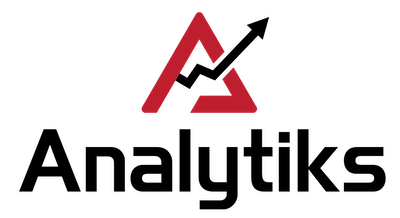</a>
<p style="text-align: right;"> © 2019. Analytiks Inc. </p>

# Polynomial Regression with Ridge and Lasso

## Import Libraries

### Standard Libraries

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

### Additional Libraries

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html">
    <b>PolynomialFeatures</b></a>: <i>Generate polynomial and interaction features.</i>
<br>
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html"><b>pipeline</b></a>: <i>Pipeline of transforms with a final estimator. Sequentially apply a list of transforms and a final estimator.</i>

In [97]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.pipeline import make_pipeline

## Load and Explore the Data

Dataset: Employment and Wages in the United Kingdom <br>
<a href="https://vincentarelbundock.github.io/Rdatasets/doc/plm/EmplUK.html">More Information</a>

In [98]:
#Provide the path of the dataset
df = pd.read_csv("EmplUK.csv", index_col=0)

In [99]:
#Display the dataset
df.head()

,firm,year,sector,emp,wage,capital,output
1,1,1977,7,5.041,13.1516,0.5894,95.707199
2,1,1978,7,5.600,12.3018,0.6318,97.356903
3,1,1979,7,5.015,12.8395,0.6771,99.608299
4,1,1980,7,4.715,13.8039,0.6171,100.550100
5,1,1981,7,4.093,14.2897,0.5076,99.558098


We will use Capital as our Y - class

In [100]:
#Describe the Dataset
df.describe()

,firm,year,sector,emp,wage,capital,output
count,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000
mean,73.203686,1979.650824,5.123181,7.891677,23.918803,2.507432,103.801196
std,41.233331,2.216070,2.678095,15.934922,5.648418,6.248712,9.938008
min,1.000000,1976.000000,1.000000,0.104000,8.017100,0.011900,86.900002
25%,37.000000,1978.000000,3.000000,1.180500,20.636450,0.221000,97.097549
50%,74.000000,1980.000000,5.000000,2.287000,24.006001,0.518000,100.550100
75%,110.000000,1981.000000,8.000000,7.020000,27.493600,1.500950,110.602850
max,140.000000,1984.000000,9.000000,108.562000,45.231800,47.107899,128.365300


## Correlation

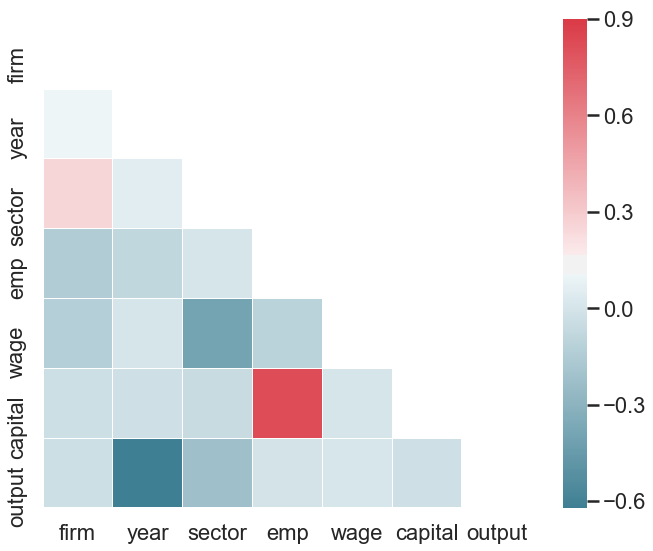

In [101]:
#Visualize the Correlation

corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, square=True, linewidths=.5, ax=ax)


## Build the Model

In [102]:
#Split the dataset to training and testing set
df_train, df_test = train_test_split(df, test_size=0.25, random_state=35)
x_train = df_train["emp"]
y_train = df_train["capital"]

x_test = df_test["emp"]
y_test = df_test["capital"]

In [103]:
# fit the polynomial regression model using the following commands
X2 = PolynomialFeatures(6).fit_transform(x_train.values.reshape(-1,1))

In [104]:
#we will fit and analyse the model of which degree is best to use
#using anova_lm function - anova = Analysis Of Variance
reg = LinearRegression()

In [105]:
reg.fit(X2, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Validate the Model

In [106]:
# Predict the value of the generated ages
# best degree is 2
x_test_fit = PolynomialFeatures(6).fit_transform(x_test.values.reshape(-1,1))
pred1 = reg.predict(x_test_fit)

In [107]:
#Create function to generate performance metrics

def measure_performance(actual,predicted):
    r2 = r2_score(actual, predicted) * 100
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted) 
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    
    print(("r2: %.2f") %r2)
    print(("mae: %.2f") %mae)
    print(("mse: %.2f") %mse)
    print(("rmse: %.2f") %rmse)

In [108]:
#Measure the performance of the model
measure_performance(y_test,pred1)

r2: 79.83
mae: 1.00
mse: 8.33
rmse: 2.89


Text(0,0.5,'Capital')

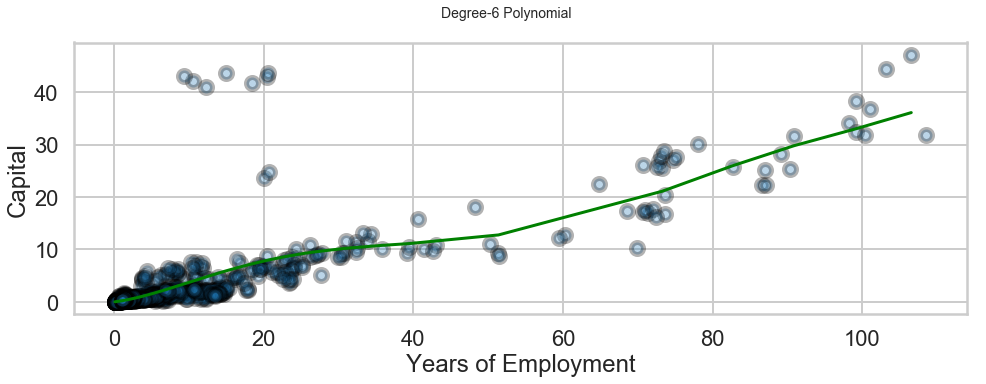

In [109]:
#Visualize

#Creating plots
fig, ax1 = plt.subplots(figsize=(16,5))
fig.suptitle("Degree-6 Polynomial", fontsize=14)

#Sort the points of prediction in ascending order
pred1_sort = pd.Series(pred1, index = x_test.index).sort_values()
x_test_sort = x_test.sort_values()

# Scatter plot with polynomial regression line
plt.scatter(df["emp"], df["capital"], facecolor=None, edgecolor="k", alpha=0.3, linewidths=5)
plt.plot(x_test_sort, pred1_sort, color = "g", linewidth=3)
plt.xlabel('Years of Employment')
plt.ylabel('Capital')

# Polynomial Function with Ridge Regularization

Test and Predict; degree = 4
<br>
* x_train is transformed training set
* y_train is the train target
* x_test_fit is the transformed test set

In [125]:
a=0
d=range(1,100,1)
g=range(0,100,1)
for pf,c in zip(d,g):
    c=c/100
    model = make_pipeline(PolynomialFeatures(pf), Ridge(normalize=True,alpha=c))
    model.fit(x_train.values.reshape(-1,1), y_train)
    ridge_predict = model.predict(x_test.values.reshape(-1,1))
    ans=r2_score(y_test,ridge_predict)*100
    if ans > a:
        a=ans
        b=pf
    else:
        continue     
print (a,b,c)

(81.23442233642987, 18, 0)


In [114]:
    model = make_pipeline(PolynomialFeatures(18), Ridge(normalize=True,alpha=0))
    model.fit(x_train.values.reshape(-1,1), y_train)
    ridge_predict = model.predict(x_test.values.reshape(-1,1))
    measure_performance(y_test, ridge_predict)

r2: 81.23
mae: 1.04
mse: 7.75
rmse: 2.78


In [115]:
model = make_pipeline(PolynomialFeatures(10), Ridge(normalize=True,alpha=.3))
model.fit(x_train.values.reshape(-1,1), y_train)
ridge_predict = model.predict(x_test.values.reshape(-1,1))
measure_performance(y_test, ridge_predict)

r2: 76.12
mae: 1.29
mse: 9.86
rmse: 3.14


In [43]:
model = make_pipeline(PolynomialFeatures(4), Ridge(normalize=True))
model.fit(x_train.values.reshape(-1,1), y_train)
ridge_predict = model.predict(x_test.values.reshape(-1,1))

In [44]:
#Measure the performance of the model
measure_performance(y_test, ridge_predict)

r2: 70.75
mae: 1.63
mse: 12.08
rmse: 3.48


Text(0,0.5,'Capital')

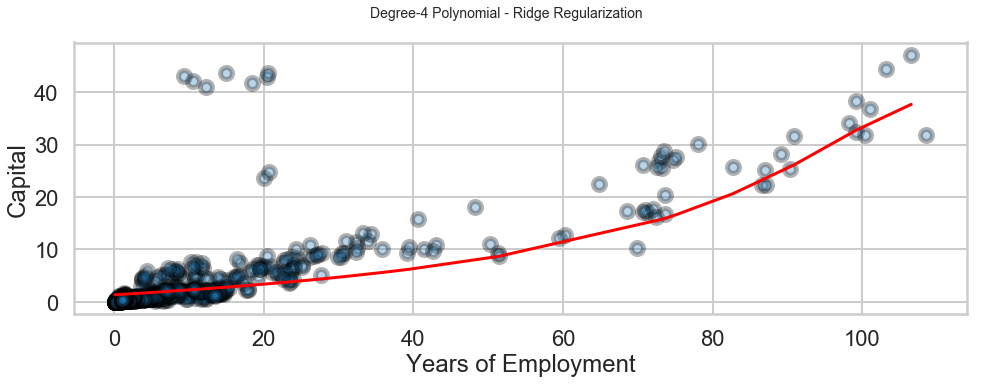

In [30]:
#Visualize

#Creating plots
fig, ax1 = plt.subplots(figsize=(16,5))
fig.suptitle("Degree-4 Polynomial - Ridge Regularization", fontsize=14)

#Sort the points of prediction in ascending order
ridge_predict_sort = pd.Series(ridge_predict, index = x_test.index).sort_values()
x_test_sort = x_test.sort_values()

#Scatter plot with polynomial regression line
plt.scatter(df["emp"], df["capital"], facecolor=None, edgecolor="k", alpha=0.3, linewidths=5)
plt.plot(x_test_sort, ridge_predict_sort, color = "r", linewidth=3)
plt.xlabel('Years of Employment')
plt.ylabel('Capital')

## Polynomial Function with Lasso Regularization

Test and Predict; degree = 4
<br>
* X5 is transformed training set
* y_train is the train target
* x_test_fit is the transformed test set

In [21]:
model = make_pipeline(PolynomialFeatures(4), Lasso())
model.fit(x_train.values.reshape(-1,1), y_train)
lasso_predict = model.predict(x_test.values.reshape(-1,1))

In [22]:
#Measure the performance of the model
measure_performance(y_test, ridge_predict)

r2: 70.75
mae: 1.63
mse: 12.08
rmse: 3.48


Text(0,0.5,'Capital')

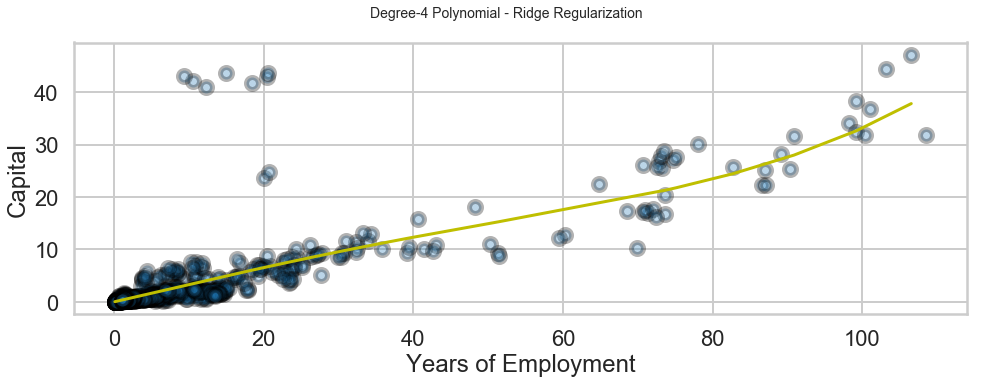

In [23]:
#Visualize

#Creating plots
fig, ax1 = plt.subplots(figsize=(16,5))
fig.suptitle("Degree-4 Polynomial - Ridge Regularization", fontsize=14)

#Sort the points of prediction in ascending order
lasso_predict_sort = pd.Series(lasso_predict, index = x_test.index).sort_values()
x_test_sort = x_test.sort_values()

#Scatter plot with polynomial regression line
plt.scatter(df["emp"], df["capital"], facecolor=None, edgecolor="k", alpha=0.3, linewidths=5)
plt.plot(x_test_sort, lasso_predict_sort, color = "y", linewidth=3)
plt.xlabel('Years of Employment')
plt.ylabel('Capital')

## Compare Models

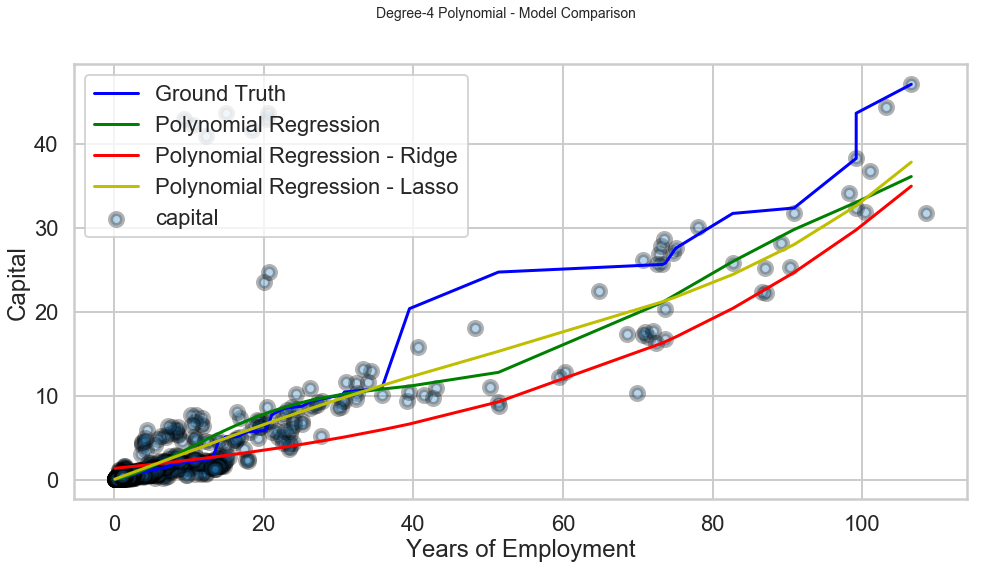

In [24]:
#Visualize

#Creating plots
fig, ax1 = plt.subplots(figsize=(16,8))
fig.suptitle("Degree-4 Polynomial - Model Comparison", fontsize=14)

#Sort the points in ascending order
y_test_sort = pd.Series(y_test, index = x_test.index).sort_values()
x_test_sort = x_test.sort_values()

#Scatter plot with polynomial regression line
plt.scatter(df["emp"], df["capital"], facecolor=None, edgecolor="k", alpha=0.3, linewidths=5)

plt.plot(x_test_sort, y_test_sort, color = "b", linewidth=3, label="Ground Truth")
plt.plot(x_test_sort, pred1_sort, color = "g", linewidth=3, label="Polynomial Regression")
plt.plot(x_test_sort, ridge_predict_sort, color = "r", linewidth=3, label="Polynomial Regression - Ridge")
plt.plot(x_test_sort, lasso_predict_sort, color = "y", linewidth=3, label="Polynomial Regression - Lasso")
plt.xlabel('Years of Employment')
plt.ylabel('Capital')
plt.legend(loc='upper left')
plt.show()